In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("magma")

params = {
    'legend.fontsize': '15',
    'figure.figsize': (15, 8),
     'axes.labelsize': '20',
     'axes.titlesize':'30',
     'xtick.labelsize':'18',
     'ytick.labelsize':'18',
}
plt.rcParams.update(params)

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import TomekLinks

In [37]:
def plotDf(df, layOut=(4,4)):
    df.plot(kind='line', subplots=True, layout=layOut, figsize=(22,50))
    plt.show()
    
def normalize(a):
    return (a-a.min())/(a.max()-a.min())

In [527]:
df = pd.read_csv("books.csv", error_bad_lines = False)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [528]:
df.columns = ['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code', 'num_pages', 'ratings_count', 'text_reviews_count', 'publication_date', 'publisher']

In [529]:
df["publication_year"] = df["publication_date"].apply(lambda x: int(x.split("/")[2]))
df["publication_day"] = df["publication_date"].apply(lambda x: int(x.split("/")[1]))
df["publication_month"] = df["publication_date"].apply(lambda x: int(x.split("/")[0]))

In [530]:
df1 = df

In [57]:
df1.head(2)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year,publication_day,publication_month
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006,16,9
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004,1,9


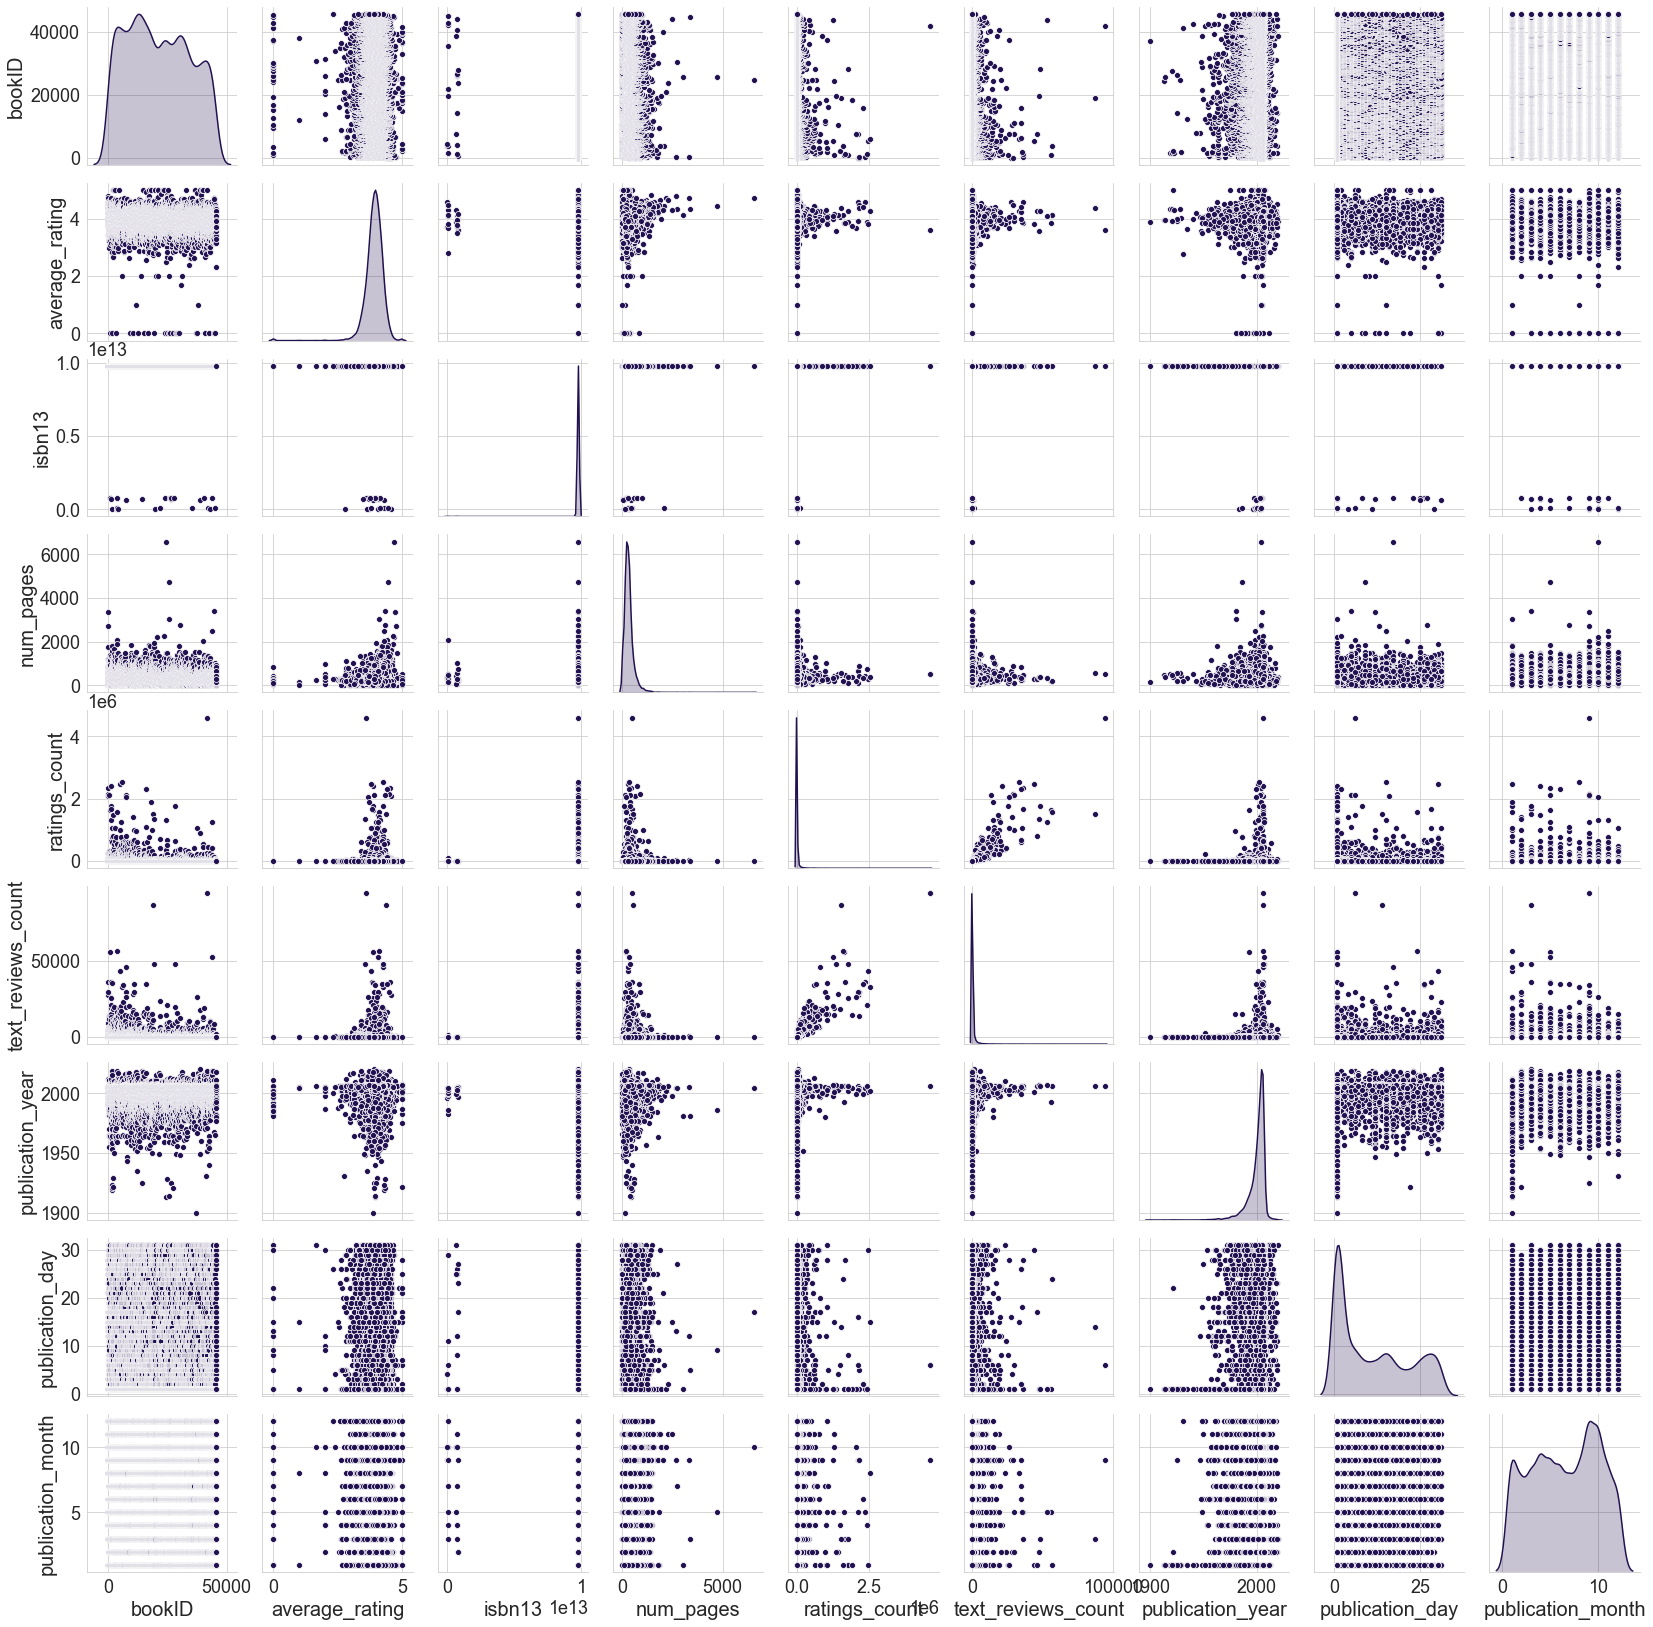

In [58]:
sns.pairplot(df, diag_kind='kde')

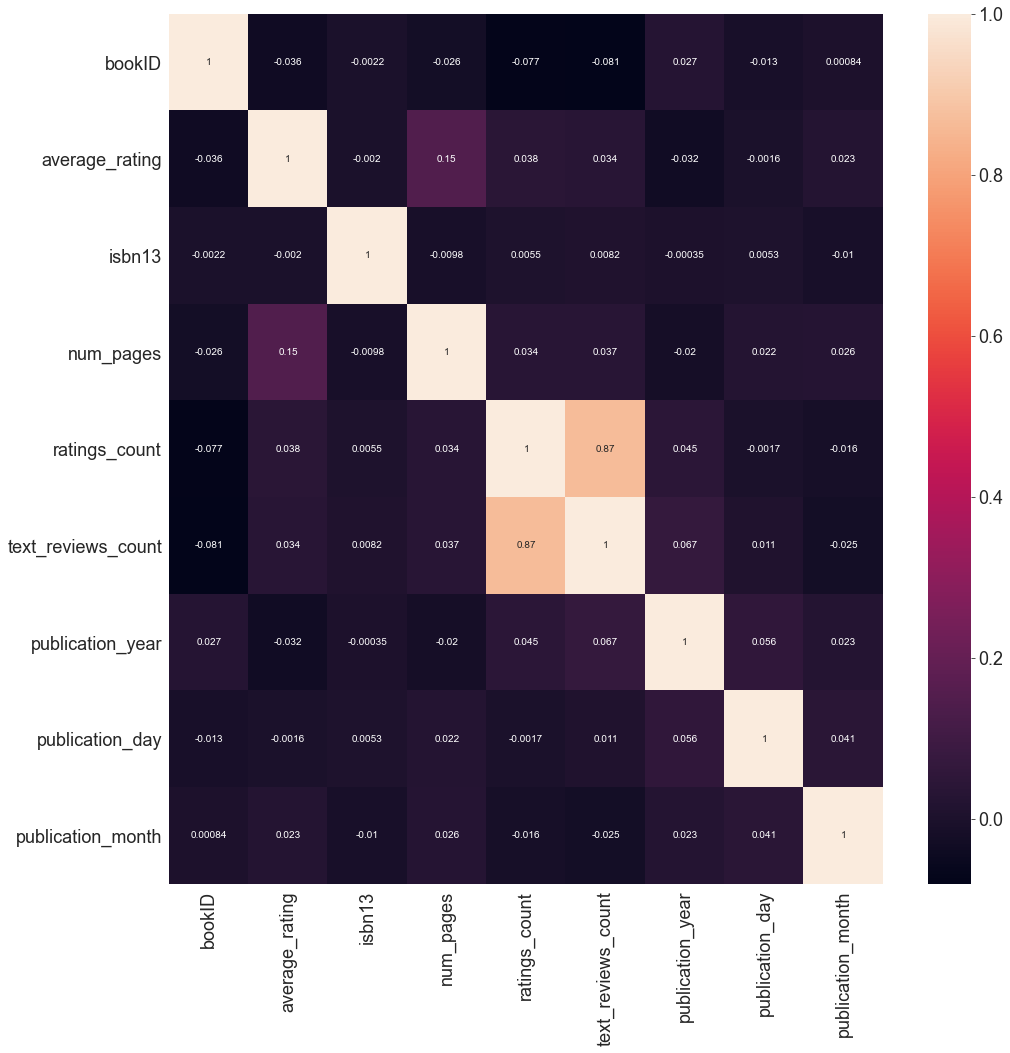

In [59]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Average Book Rating

<AxesSubplot:ylabel='Frequency'>

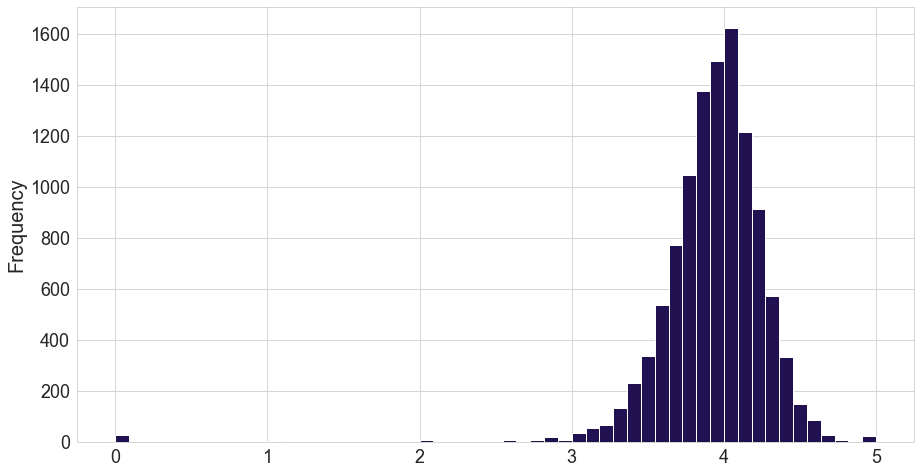

In [60]:
df["average_rating"].plot(kind="hist", bins=55)

In [61]:
rating = df["average_rating"]

<AxesSubplot:ylabel='Frequency'>

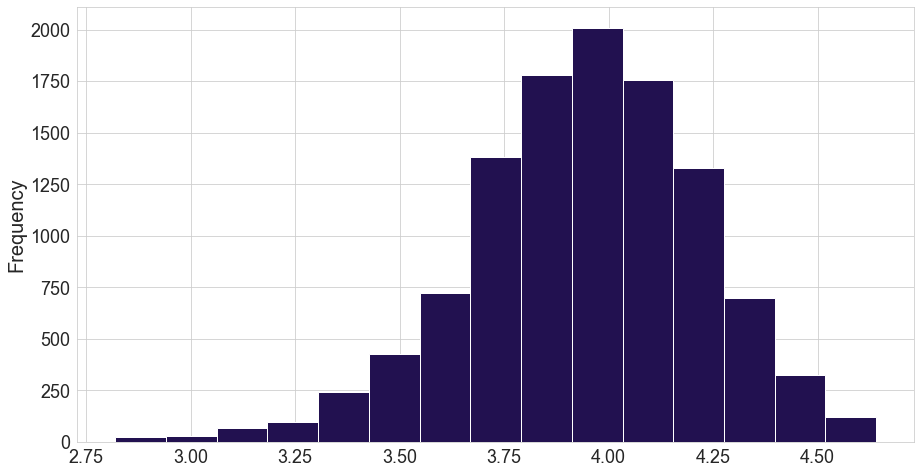

In [62]:
rating99 = rating[rating.between(rating.quantile(.005), rating.quantile(.995))]
rating99.plot(kind="hist", bins=15)

## df2 = Remove values that are like 0, 1, 5.0 outside of normal distribution
    - Minimum = 2.82
    - Maximum = 4.64

In [63]:
df2 = df[rating.between(rating.quantile(.005), rating.quantile(.995))]
# df = df[df["average_rating"].isin(rating[rating.between(rating.quantile(.005), rating.quantile(.995))])]

In [64]:
len(df2)-len(df),len(df2)/len(df)

(-112, 0.9899307740717432)

# Language Code

<AxesSubplot:>

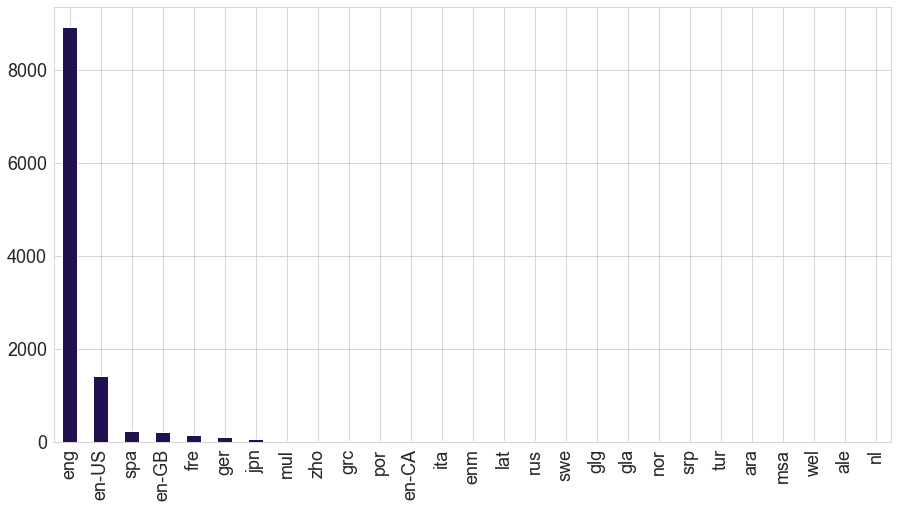

In [65]:
df["language_code"].value_counts().plot(kind="bar")

In [68]:
endf = df[df["language_code"].str.contains("eng|en-")]

In [128]:
len(endf)-len(df), len(endf)/len(df)

(-586, 0.9473163714825137)

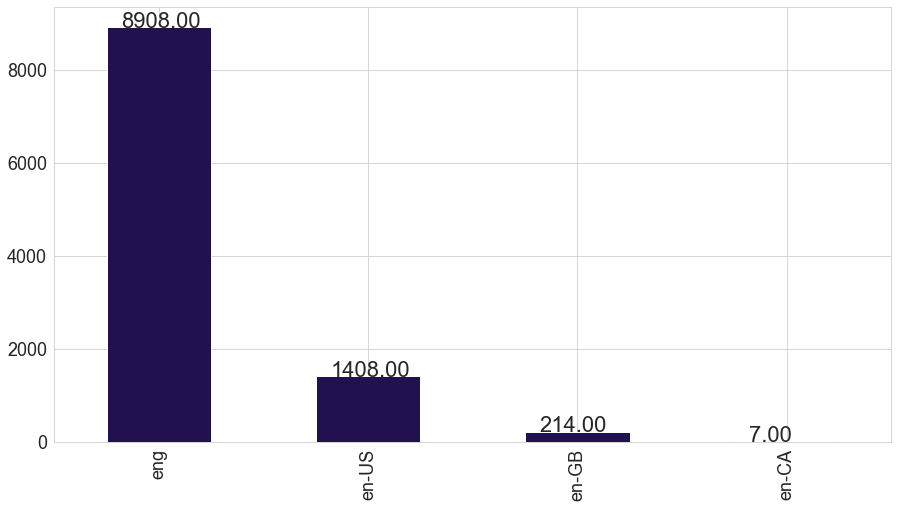

In [149]:
ax = endf["language_code"].value_counts().plot(kind="bar")
x_offset = -0.18
y_offset = 0.02
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset), fontsize=22)

## df3 = Remove language codes outside of containing english (1) cant understand, (2) population is low, (3) different culture

In [95]:
df3 = df2[df2["language_code"].str.contains("eng|en-")]
len(df3)-len(df), len(df3)/len(df)

(-693, 0.9376966645689113)

# Book Page Count

In [71]:
df[["title", "num_pages"]].sort_values("num_pages")

,title,num_pages
2765,The Far Pavilions,0
2448,The Complete Science Fiction Treasury of H.G. ...,0
8989,First King of Shannara (Shannara Prequel),0
8953,13th Directorate,0
2676,Blind Willow Sleeping Woman: 24 Stories,0
...,...,...
6822,Summa Theologica 5 Vols,3020
6,Harry Potter Collection (Harry Potter #1-6),3342
10906,Remembrance of Things Past (Boxed Set),3400
6802,The Second World War,4736


<AxesSubplot:ylabel='Frequency'>

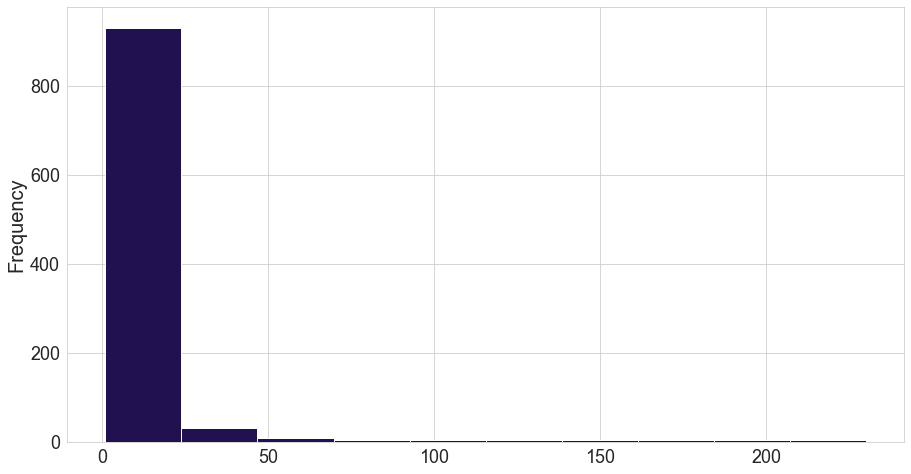

In [72]:
df["num_pages"].value_counts().plot(kind="hist", bins=10)

(1.0, 2001.0)

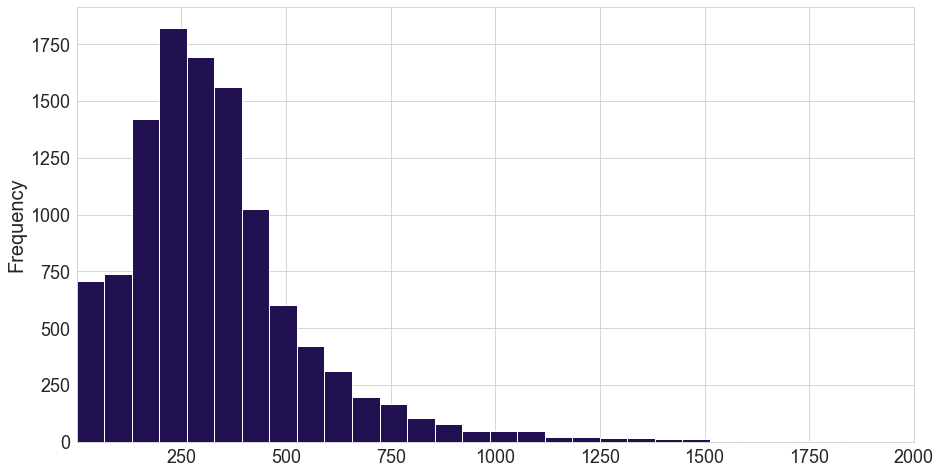

In [122]:
ax = df["num_pages"].plot(kind="hist", bins=100)
ax.set_xlim([1, 2001])
# ax.set_ylim([0, 5])

<AxesSubplot:xlabel='num_pages'>

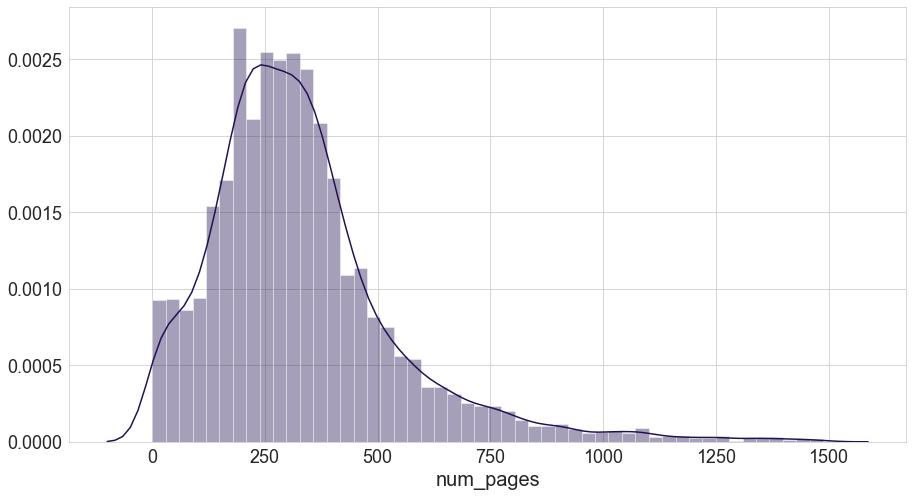

In [123]:
sns.distplot(df4["num_pages"], bins=50)

## df4 = Remove books that are really long (1) theyre bibles, (2) they are collections of several books shouldnt count twice

In [96]:
df4 = df3[df3["num_pages"] < 1500]
len(df4)-len(df), len(df4)/len(df)

(-720, 0.935269261889778)

<AxesSubplot:>

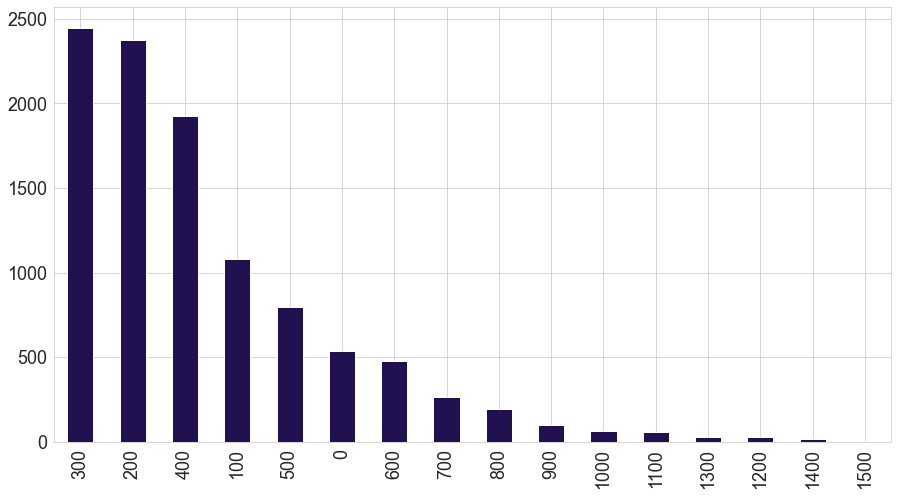

In [525]:
df4["num_pages"].apply(lambda x: round(x, -2)).value_counts().plot(kind="bar")

<AxesSubplot:ylabel='Frequency'>

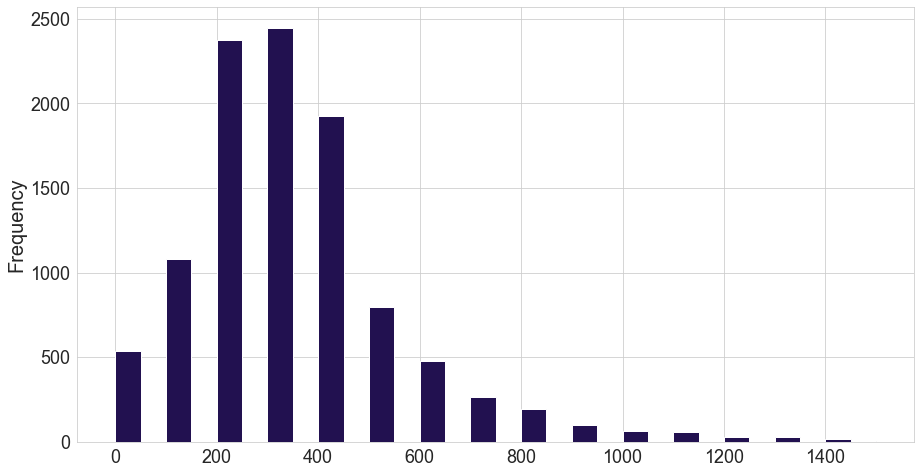

In [526]:
df4["num_pages"].apply(lambda x: round(x, -2)).plot(kind="hist", bins=30)

## df4, Also round the book counts, we dont really care exactly the book count

In [ ]:
df4["num_pages"] = df4["num_pages"].apply(lambda x: round(x, -1))

# Ratings Count

<AxesSubplot:>

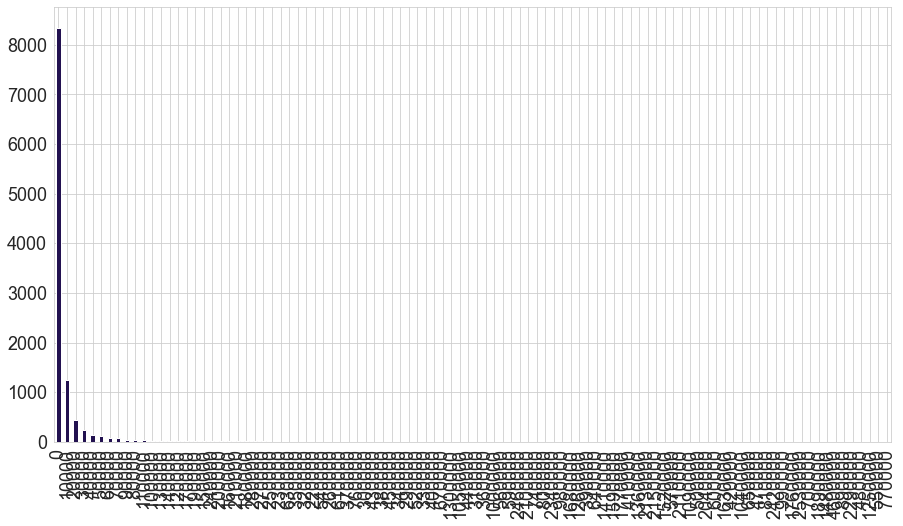

In [557]:
df["ratings_count"].apply(lambda x: round(x, -4)).value_counts().plot(kind="bar")

In [560]:
df["ratings_count"].apply(lambda x: round(x, -5)).value_counts()

0          10455
100000       433
200000       100
300000        41
400000        21
600000        17
500000        12
1000000        6
800000         6
700000         4
2100000        3
1300000        3
1100000        2
2300000        2
1400000        2
1500000        2
2500000        2
1600000        2
1800000        2
900000         1
2400000        1
2200000        1
1200000        1
1700000        1
4600000        1
2000000        1
1900000        1
Name: ratings_count, dtype: int64

In [97]:
ratecountdf = df[["ratings_count"]]
ratecountdf = ratecountdf[ratecountdf["ratings_count"] > 10]
ratecountdf.sort_values("ratings_count", ascending=False)

,ratings_count
10336,4597666
1697,2530894
1462,2457092
307,2418736
3,2339585
...,...
263,11
9357,11
7284,11
10459,11


<AxesSubplot:>

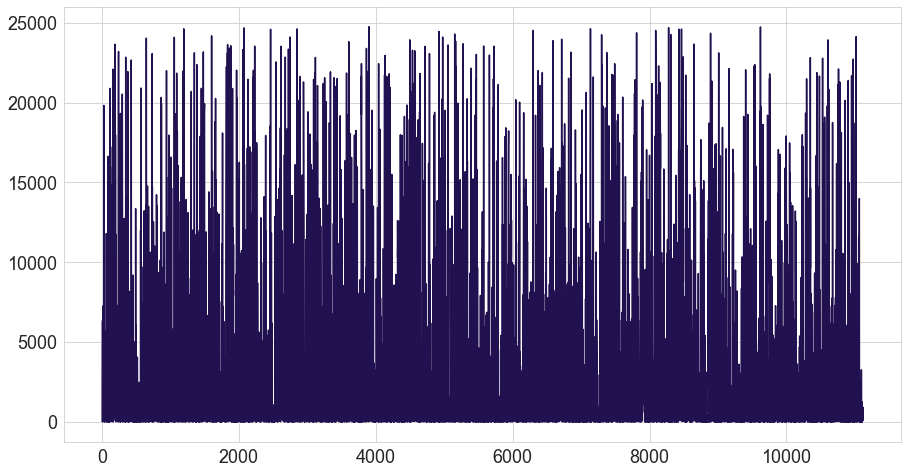

In [99]:
ratingcount = df["ratings_count"]
ratingc = ratingcount[ratingcount.between(rating.quantile(.1), ratingcount.quantile(.9))]
ratingc.plot()

In [100]:
ratingc.min()

4

In [101]:
len(ratingc)/len(df)

0.8721567922323115

<AxesSubplot:>

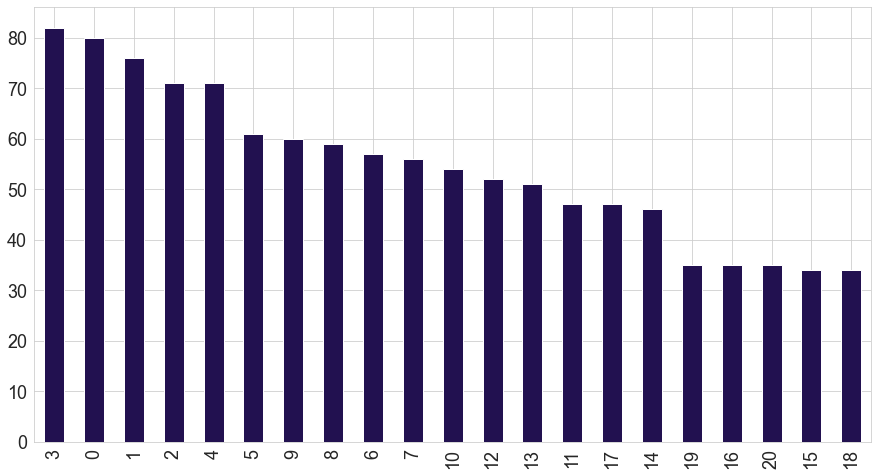

In [107]:
df[df["ratings_count"] <= 20]["ratings_count"].value_counts().plot(kind="bar")

<AxesSubplot:>

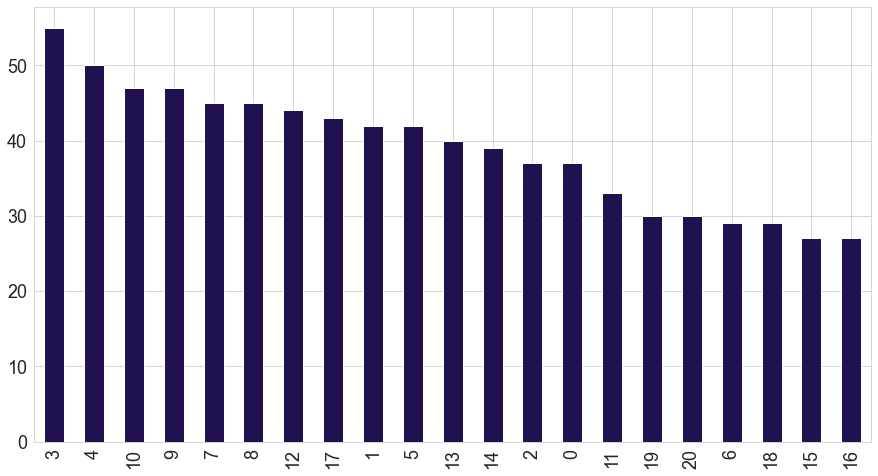

In [108]:
df4[df4["ratings_count"] <= 20]["ratings_count"].value_counts().plot(kind="bar")

# Text Reviews Count

<AxesSubplot:>

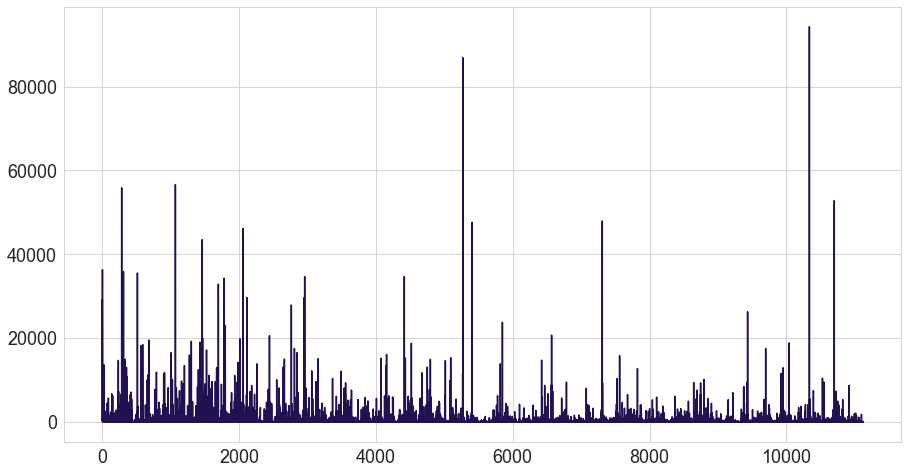

In [211]:
df["text_reviews_count"].plot()

<AxesSubplot:>

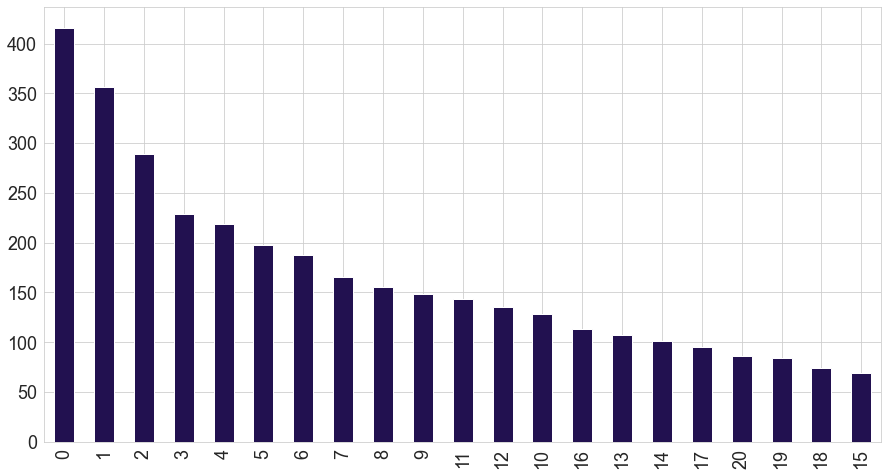

In [124]:
df4[df4["text_reviews_count"] <= 20]["text_reviews_count"].value_counts().plot(kind="bar")

# Publication Date

In [109]:
df["publication_date"][0].split("/")[2]

'2006'

In [110]:
# df["publication_year"] = df["publication_date"].apply(lambda x: int(x.split("/")[2]))
# df["publication_day"] = df["publication_date"].apply(lambda x: int(x.split("/")[1]))
# df["publication_month"] = df["publication_date"].apply(lambda x: int(x.split("/")[0]))

<AxesSubplot:>

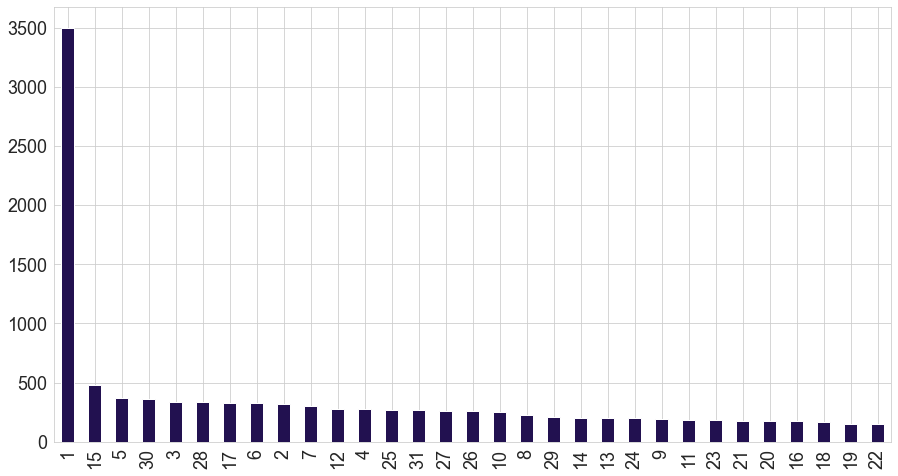

In [314]:
df["publication_day"].value_counts().plot(kind="bar")

<AxesSubplot:>

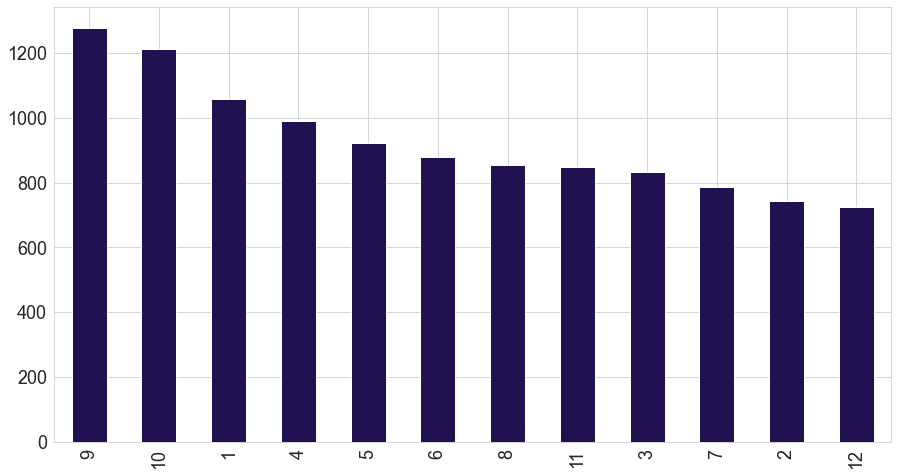

In [312]:
df["publication_month"].value_counts().plot(kind="bar")

In [356]:
str(df["publication_year"].value_counts(bins=10).index[0])

'(1996.0, 2008.0]'

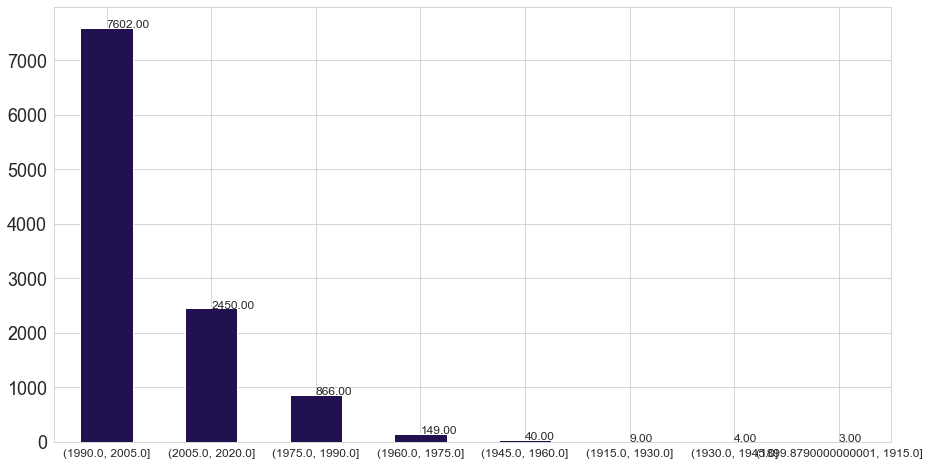

In [125]:
ax = df["publication_year"].value_counts(bins=8).plot(kind="bar", rot=0)
ax.set_xticklabels(df["publication_year"].value_counts(bins=8).index, fontsize=12)
x_offset = 0.0
y_offset = 0.02
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset), fontsize=12)

In [114]:
df["publication_year"].value_counts(bins=8)

(1990.0, 2005.0]                7602
(2005.0, 2020.0]                2450
(1975.0, 1990.0]                 866
(1960.0, 1975.0]                 149
(1945.0, 1960.0]                  40
(1915.0, 1930.0]                   9
(1930.0, 1945.0]                   4
(1899.8790000000001, 1915.0]       3
Name: publication_year, dtype: int64

In [116]:
df[df["publication_year"].between(1960.0, 1975)]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year,publication_day,publication_month
92,154,CliffsNotes on Tolstoy's Anna Karenina,Marianne Sturman/Leo Tolstoy,3.85,0822001837,9780822001836,eng,80,16,3,11/26/1965,Cliffs Notes,1965,26,11
121,245,Henry Miller on Writing,Henry Miller/Thomas H. Moore,4.22,0811201120,9780811201124,eng,217,981,52,2/1/1964,New Directions Publishing,1964,1,2
127,253,The Air-Conditioned Nightmare,Henry Miller,3.83,0811201066,9780811201063,eng,292,2699,142,1/17/1970,New Directions,1970,17,1
236,663,For the New Intellectual: The Philosophy of Ay...,Ayn Rand,3.68,0451163087,9780451163080,eng,224,2750,108,12/1/1963,Signet Book,1963,1,12
238,665,The Virtue of Selfishness: A New Concept of Eg...,Ayn Rand/Nathaniel Branden,3.51,0451163931,9780451163936,eng,176,11462,467,11/1/1964,Signet,1964,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10328,41834,Asimov's Guide to the Bible: The Old Testament,Isaac Asimov,4.07,0380010321,9780380010325,eng,677,237,20,11/1/1971,Avon Books (P),1971,1,11
10432,42429,Cliffs Notes on Hemingway's The Sun Also Rises,Gary K. Carey,3.50,0822012375,9780822012375,eng,80,14,2,5/20/1964,Cliffs Notes,1964,20,5
10459,42594,CliffsNotes on Shakespeare's Twelfth Night,James Lamar Roberts/CliffsNotes/William Shakes...,4.16,0822000946,9780822000945,eng,64,11,2,9/20/1960,Cliffs Notes,1960,20,9
10943,44866,Poetry and Prose of Alexander Pope (Riverside ...,Alexander Pope/Aubrey Williams,3.97,0395051568,9780395051566,eng,512,93,5,1/2/1968,Houghton Mifflin Company,1968,2,1


In [324]:
df[df["publication_year"] == 2020]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year,publication_month,publication_day
9664,38568,A Quick Bite (Argeneau #1),Lynsay Sands,3.91,0060773758,9780060773755,eng,360,35275,1370,3/31/2020,Avon,2020,3,31


# Publisher

<AxesSubplot:>

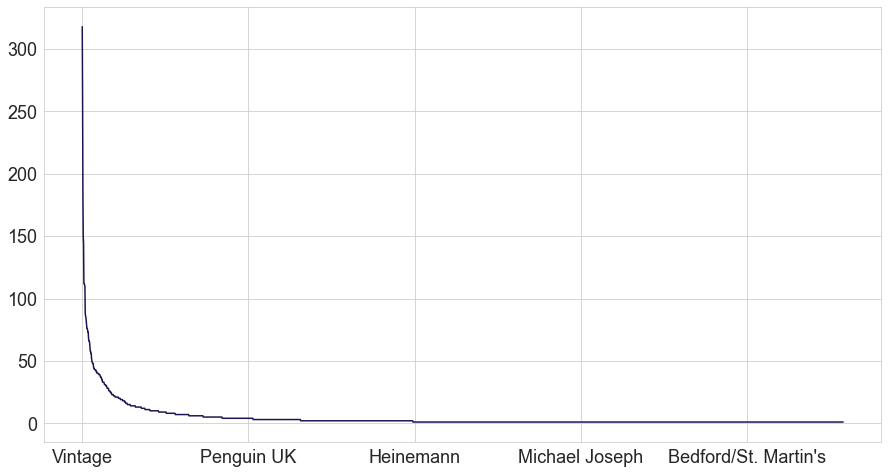

In [232]:
df["publisher"].value_counts().plot()

In [276]:
vc = df["publisher"].value_counts()
vc2 = vc[vc > 1]
df[df["publisher"].isin(list(pd.DataFrame(vc2).T.columns))]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco


In [287]:
df[df["publisher"].str.contains("Penguin")]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
89,151,Anna Karenina,Leo Tolstoy/Richard Pevear/Larissa Volokhonsky,4.05,0143035002,9780143035008,eng,838,16643,1851,5/31/2004,Penguin Classics
91,153,Anna Karenina,Leo Tolstoy/Richard Pevear/Larissa Volokhonsky...,4.05,0140449175,9780140449174,eng,837,2904,309,1/30/2003,Penguin Books
98,162,Untouchable,Mulk Raj Anand/E.M. Forster,3.71,0140183957,9780140183955,eng,160,3429,279,7/3/1990,Penguin Books
128,264,The Portrait of a Lady,Henry James/Patricia Crick,3.78,0141439637,9780141439631,eng,797,61640,1951,9/30/2003,Penguin Classics
135,289,The Beloved: Reflections on the Path of the Heart,Kahlil Gibran/John Walbridge/Robin Waterfield,4.19,014019553X,9780140195538,eng,102,328,16,1/1/1998,Penguin Books
...,...,...,...,...,...,...,...,...,...,...,...,...
11095,45533,Montaillou: Cathars and Catholics in a French ...,Emmanuel Le Roy Ladurie/Barbara Bray,3.96,0140054715,9780140054712,en-GB,400,17,2,5/29/1980,Penguin Books Ltd.
11096,45536,On the Road,Jack Kerouac/Ann Charters,3.63,0142437255,9780142437254,en-US,307,3271,342,1/3/2006,Penguin Classics
11117,45630,Whores for Gloria,William T. Vollmann,3.69,0140231579,9780140231571,en-US,160,932,111,2/1/1994,Penguin Books
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books


# Clustering

In [137]:
df4.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher', 'publication_year', 'publication_day',
       'publication_month'],
      dtype='object')

In [138]:
df5 = df4[['title', 'authors', 'average_rating', 
           'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
           'publisher', 'publication_year', 'publication_day','publication_month']]

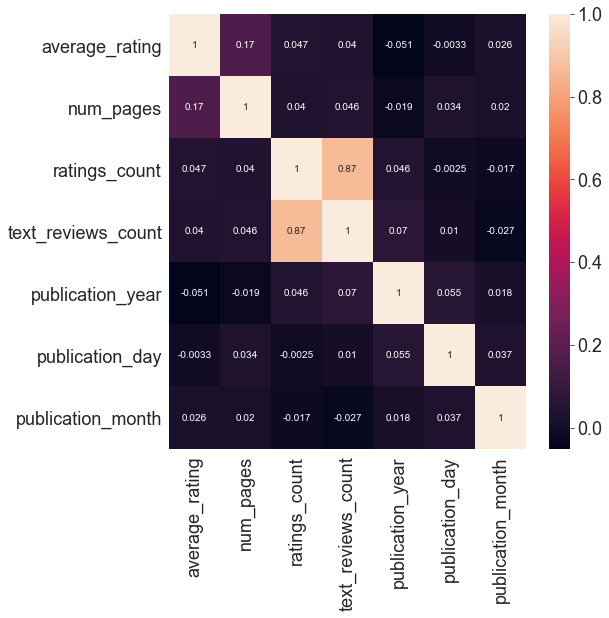

In [479]:
plt.figure(figsize=(8,8))
sns.heatmap(df5.corr(), annot=True)
plt.show()

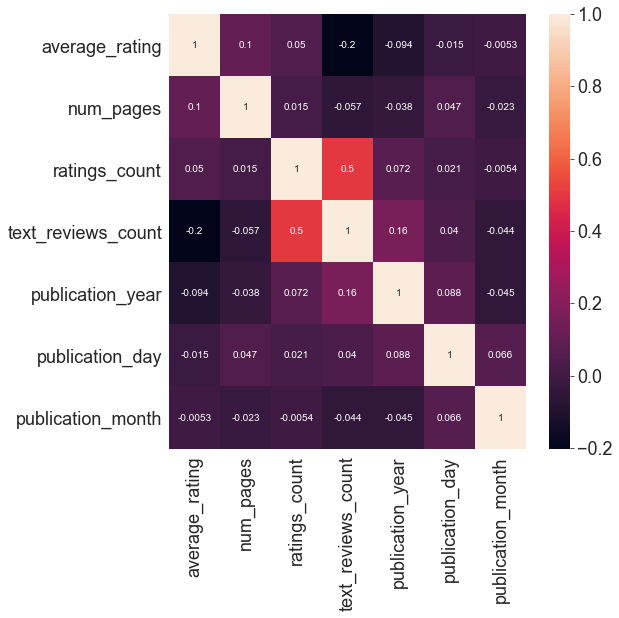

In [478]:
plt.figure(figsize=(8,8))
sns.heatmap(df5[(df5.ratings_count.between(10000, 50000))].corr(), annot=True)
plt.show()

In [195]:
df5.num_pages.value_counts()

288     224
320     212
256     203
192     196
352     194
       ... 
1431      1
1003      1
1035      1
1051      1
939       1
Name: num_pages, Length: 955, dtype: int64

In [477]:
df5[(df5.publication_day==2)].corr()

,average_rating,num_pages,ratings_count,text_reviews_count,publication_year,publication_day,publication_month
average_rating,1.000000,0.171420,0.121427,0.102352,-0.133908,NaN,0.060803
num_pages,0.171420,1.000000,-0.011982,0.025205,-0.040676,NaN,0.101619
ratings_count,0.121427,-0.011982,1.000000,0.926775,-0.017409,NaN,0.044698
text_reviews_count,0.102352,0.025205,0.926775,1.000000,0.012199,NaN,0.078768
publication_year,-0.133908,-0.040676,-0.017409,0.012199,1.000000,NaN,0.005120
publication_day,NaN,NaN,NaN,NaN,NaN,NaN,NaN
publication_month,0.060803,0.101619,0.044698,0.078768,0.005120,NaN,1.000000


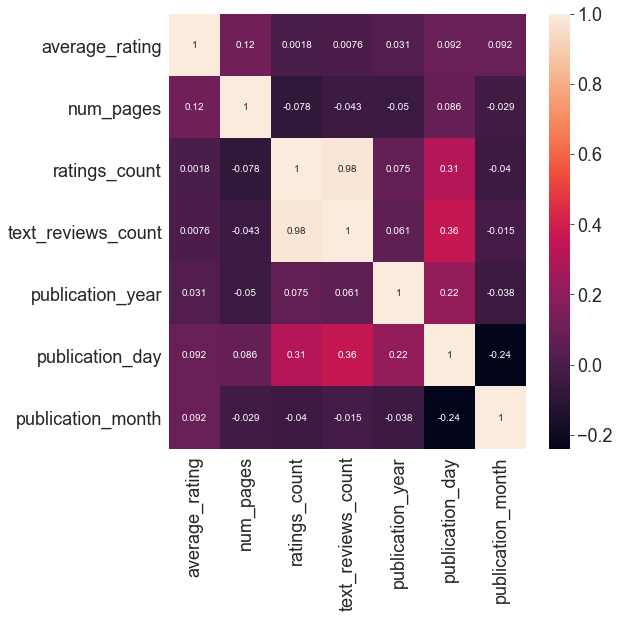

In [476]:
plt.figure(figsize=(8,8))
sns.heatmap(df5[(df5.num_pages>1200)].corr(), annot=True)
plt.show()

In [141]:
df5[(df5.ratings_count>2000000)]

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publisher,publication_year,publication_day,publication_month
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,Scholastic Inc.,2006,16,9
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,Scholastic Inc.,2004,1,9
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,Scholastic Inc.,2004,1,5
23,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.36,eng,398,2128944,13670,Houghton Mifflin Harcourt,2003,5,9
307,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,eng,736,2418736,21303,Pocket Books,2006,1,4
1462,The Catcher in the Rye,J.D. Salinger,3.80,eng,277,2457092,43499,Back Bay Books,2001,30,1
1697,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,eng,366,2530894,32871,Houghton Mifflin,2002,15,8
2114,Animal Farm,George Orwell/Boris Grabnar/Peter Škerl,3.93,eng,122,2111750,29677,NAL,2003,6,5
2116,Lord of the Flies,William Golding,3.68,eng,182,2036679,26199,Penguin Books,1999,1,10
4415,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré,4.42,eng,341,2293963,34692,Arthur A. Levine Books / Scholastic Inc.,1999,2,6


In [ ]:
df5.plot.scatter(x="average_rating", y="num_pages")

<Figure size 1440x360 with 0 Axes>

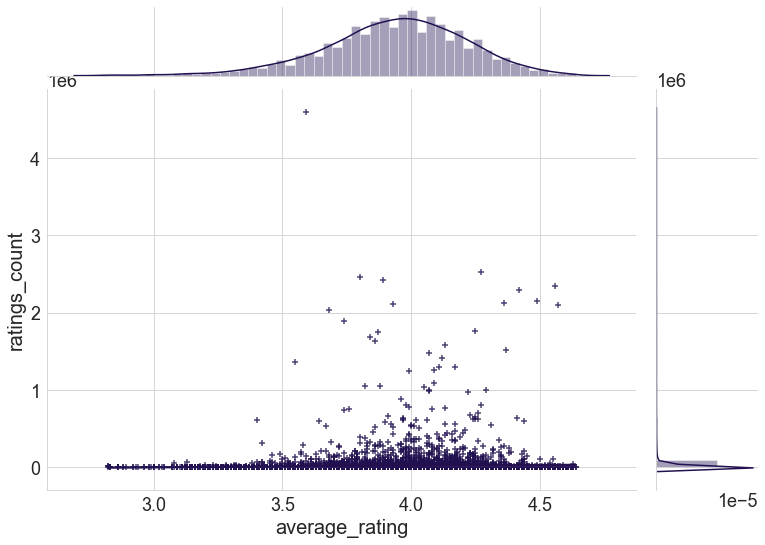

In [164]:
plt.figure(figsize=(20, 5))
grid = sns.jointplot(x="average_rating", y="ratings_count",
              data=df5, kind="reg", marker="+")
grid.fig.set_figwidth(12)
grid.fig.set_figheight(8)
plt.show()

In [360]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher', 'publication_year', 'publication_day',
       'publication_month'],
      dtype='object')

In [637]:
df6 = df5[["average_rating", "num_pages", "ratings_count", "text_reviews_count",
           'publication_year', 'publication_day','publication_month']]

df7 = df5[["publication_day", "average_rating", "ratings_count"]]

In [638]:
df7.astype(float)

,publication_day,average_rating,ratings_count
0,16.0,4.57,2095690.0
1,1.0,4.49,2153167.0
2,1.0,4.42,6333.0
3,1.0,4.56,2339585.0
5,26.0,3.74,19.0
...,...,...,...
11117,1.0,3.69,932.0
11118,21.0,4.06,156.0
11119,1.0,4.08,783.0
11120,1.0,3.96,820.0


In [639]:
from sklearn import metrics
from sklearn.cluster import KMeans, AffinityPropagation, DBSCAN
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler

In [640]:
random_state = 10

In [641]:
scaler = MinMaxScaler()
a = scaler.fit_transform(X)

In [642]:
X =df7.values

In [643]:
y_pred = KMeans(n_clusters=4, random_state=random_state).fit(df7)

In [644]:
y_pred.cluster_centers_

array([[1.13168455e+01, 3.93599424e+00, 6.35829499e+03],
       [8.78947368e+00, 4.08894737e+00, 2.13014058e+06],
       [1.20488722e+01, 4.02214286e+00, 2.03113368e+05],
       [1.22600000e+01, 4.03280000e+00, 7.80363580e+05]])

In [645]:
y_pred.inertia_

15952137297578.715

In [646]:
# cluster_centers_indices = y_pred.cluster_centers_indices_
labels = y_pred.labels_

# n_clusters_ = len(cluster_centers_indices)

# print('Estimated number of clusters: %d' % n_clusters_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f"
#       % metrics.adjusted_rand_score(labels_true, labels))
# print("Adjusted Mutual Information: %0.3f"
#       % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))
print("calinski_harabasz_score Coefficient: %0.3f"
      % metrics.calinski_harabasz_score(X, labels))
print("davies_bouldin_score Coefficient: %0.3f"
      % metrics.davies_bouldin_score(X, labels))

Silhouette Coefficient: 0.971
calinski_harabasz_score Coefficient: 27007.982
davies_bouldin_score Coefficient: 0.466


In [427]:
X

array([[6.520000e+02, 4.570000e+00, 2.095690e+06],
       [8.700000e+02, 4.490000e+00, 2.153167e+06],
       [3.520000e+02, 4.420000e+00, 6.333000e+03],
       ...,
       [6.350000e+02, 4.080000e+00, 7.830000e+02],
       [4.150000e+02, 3.960000e+00, 8.200000e+02],
       [4.340000e+02, 3.720000e+00, 7.690000e+02]])

In [428]:
yy = KMeans(n_clusters=4, random_state=random_state).fit(X)

In [503]:
X

array([[6.520000e+02, 4.570000e+00, 2.095690e+06],
       [8.700000e+02, 4.490000e+00, 2.153167e+06],
       [3.520000e+02, 4.420000e+00, 6.333000e+03],
       ...,
       [6.350000e+02, 4.080000e+00, 7.830000e+02],
       [4.150000e+02, 3.960000e+00, 8.200000e+02],
       [4.340000e+02, 3.720000e+00, 7.690000e+02]])

In [621]:
# %matplotlib qt
# %matplotlib inline  
# %matplotlib notebook
# %pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [647]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
palette = sns.hls_palette(4, l=.4, s=.9)


In [648]:
y_pred = KMeans(n_clusters=4, random_state=random_state).fit_predict(X)
yy = KMeans(n_clusters=3, random_state=random_state).fit(X)
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], c=y_pred)
# tsne = TSNE(verbose=1, perplexity=100, random_state=42)
# X_embedded = tsne.fit_transform(X)
# sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette, ax=ax)
sns.scatterplot(yy.cluster_centers_[:,0], yy.cluster_centers_[:,1],s=55, color="mediumspringgreen", ax=ax)
ax.set_title("4 Clusters", fontsize=18)

Text(0.5, 0.92, '4 Clusters')

In [625]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,12))
fig.tight_layout(pad=7.0)
y_pred = KMeans(n_clusters=4, random_state=random_state).fit_predict(X)
yy = KMeans(n_clusters=4, random_state=random_state).fit(X)

axes[0,0].scatter(X[:, 0], X[:, 1], c=y_pred)
tsne = TSNE(verbose=1, perplexity=100, random_state=42)
# X_embedded = tsne.fit_transform(X)
# sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette, ax=axes[0,0])
sns.scatterplot(yy.cluster_centers_[:,0], yy.cluster_centers_[:,1],s=55, color="mediumspringgreen", ax=axes[0,0])
axes[0,0].set_title("4 Clusters", fontsize=18)



# # Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229],[0.60834549, -0.63667341]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)
yy = KMeans(n_clusters=3, random_state=random_state).fit(X_aniso)

axes[0,1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
sns.scatterplot(yy.cluster_centers_[:,0], yy.cluster_centers_[:,1],s=55, color="mediumspringgreen", ax=axes[0,1])
axes[0,1].set_title("3 Clusters with transformation", fontsize=18)



# # Different normalization
scaler = MinMaxScaler()
X_varied = scaler.fit_transform(X)
y_pred = KMeans(n_clusters=4, random_state=random_state).fit_predict(X_varied)
yy = KMeans(n_clusters=4, random_state=random_state).fit(X_varied)

axes[1,0].scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
sns.scatterplot(yy.cluster_centers_[:,0], yy.cluster_centers_[:,1],s=55, color="mediumspringgreen", ax=axes[1,0])
axes[1,0].set_title("MinMax Scalar Normalization 4 Clusters", fontsize=18)



# # Different normalization
scaler = MaxAbsScaler()
X_varied = scaler.fit_transform(X)
y_pred = KMeans(n_clusters=4, random_state=random_state).fit_predict(X_varied)
yy = KMeans(n_clusters=4, random_state=random_state).fit(X_varied)

axes[1,1].scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
sns.scatterplot(yy.cluster_centers_[:,0], yy.cluster_centers_[:,1],s=55, color="mediumspringgreen", ax=axes[1,1])
axes[1,1].set_title("MinAbs Scalar Normalization 4 Clusters", fontsize=18)



# # Different normalization
scaler = StandardScaler()
X_varied = scaler.fit_transform(X)
y_pred = KMeans(n_clusters=4, random_state=random_state).fit_predict(X_varied)
yy = KMeans(n_clusters=4, random_state=random_state).fit(X_varied)

axes[2,0].scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
sns.scatterplot(yy.cluster_centers_[:,0], yy.cluster_centers_[:,1],s=55, color="mediumspringgreen", ax=axes[2,0])
axes[2,0].set_title("Standard Scalar Normalization 4 Clusters", fontsize=18)



scaler = RobustScaler()
X_varied = scaler.fit_transform(X)
y_pred = KMeans(n_clusters=4, random_state=random_state).fit_predict(X_varied)
yy = KMeans(n_clusters=4, random_state=random_state).fit(X_varied)

axes[2,1].scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
sns.scatterplot(yy.cluster_centers_[:,0], yy.cluster_centers_[:,1],s=55, color="mediumspringgreen", ax=axes[2,1])
axes[2,1].set_title("Robust Scalar Normalization 4 Clusters", fontsize=18)

plt.show()

In [654]:
y_pred = KMeans(n_clusters=4, random_state=random_state).fit_predict(X)
yy = KMeans(n_clusters=4, random_state=random_state).fit(X)
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X[:, 0], X[:, 1], c=y_pred)
tsne = TSNE(n_components=3, verbose=1, perplexity=500, random_state=42)
X_embedded = tsne.fit_transform(X)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette, ax=ax)
# sns.scatterplot(yy.cluster_centers_[:,0], yy.cluster_centers_[:,1],s=55, color="mediumspringgreen")
ax.set_title("4 Clusters", fontsize=18)



[t-SNE] Computing 1501 nearest neighbors...
[t-SNE] Indexed 10403 samples in 0.007s...
[t-SNE] Computed neighbors for 10403 samples in 1.665s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10403
[t-SNE] Computed conditional probabilities for sample 2000 / 10403
[t-SNE] Computed conditional probabilities for sample 3000 / 10403
[t-SNE] Computed conditional probabilities for sample 4000 / 10403
[t-SNE] Computed conditional probabilities for sample 5000 / 10403
[t-SNE] Computed conditional probabilities for sample 6000 / 10403
[t-SNE] Computed conditional probabilities for sample 7000 / 10403
[t-SNE] Computed conditional probabilities for sample 8000 / 10403
[t-SNE] Computed conditional probabilities for sample 9000 / 10403
[t-SNE] Computed conditional probabilities for sample 10000 / 10403
[t-SNE] Computed conditional probabilities for sample 10403 / 10403
[t-SNE] Mean sigma: 19.195541
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.337437
[t-SNE] 

Text(0.5, 0.92, '4 Clusters')

# Apriori - Finding when authors like to publish

In [431]:
from mlxtend.preprocessing import TransactionEncoder

In [447]:
df5["authors"] = df5["authors"].apply(lambda x: x.split("/")[0])

In [449]:
df5[["authors", "publisher", "publication_month"]]

,authors,publisher,publication_month
0,J.K. Rowling,Scholastic Inc.,9
1,J.K. Rowling,Scholastic Inc.,9
2,J.K. Rowling,Scholastic,11
3,J.K. Rowling,Scholastic Inc.,5
5,W. Frederick Zimmerman,Nimble Books,4
...,...,...,...
11117,William T. Vollmann,Penguin Books,2
11118,William T. Vollmann,Da Capo Press,12
11119,William T. Vollmann,Penguin Books,12
11120,William T. Vollmann,Penguin Books,8


In [467]:
df5["num_pages"] = df5["num_pages"].apply(lambda x: round(x, -1))

In [480]:
df8 = df5[["authors", "publisher", "publication_month"]]

In [484]:
records = []
for i in range(len(df8)):
    records.append([str(df8.values[i,j]) for j in range(len(df8.iloc[0]))])

In [486]:
records[0:10]

[['J.K. Rowling', 'Scholastic Inc.', '9'],
 ['J.K. Rowling', 'Scholastic Inc.', '9'],
 ['J.K. Rowling', 'Scholastic', '11'],
 ['J.K. Rowling', 'Scholastic Inc.', '5'],
 ['W. Frederick Zimmerman', 'Nimble Books', '4'],
 ['Douglas Adams', 'Gramercy Books', '11'],
 ['Douglas Adams', 'Del Rey Books', '4'],
 ['Douglas Adams', 'Crown', '8'],
 ['Douglas Adams', 'Random House Audio', '3'],
 ['Douglas Adams', 'Wings Books', '1']]

In [483]:
te.columns_

['_',
 'a',
 'b',
 'c',
 'e',
 'h',
 'i',
 'l',
 'm',
 'n',
 'o',
 'p',
 'r',
 's',
 't',
 'u']

In [487]:
te = TransactionEncoder()
te_ary = te.fit(records).transform(records)
dfa = pd.DataFrame(te_ary, columns=te.columns_)

In [488]:
dfa

,1,10,11,12,1st Book Library,1st World Library,2,3,4,5,...,Zondervan,Zondervan Publishing Company,Zora Neale Hurston,Zoë Heller,bell hooks,iBooks,iUniverse,rbooks,Åsne Seierstad,Émile Zola
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10398,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10399,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10400,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10401,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [493]:
from mlxtend.frequent_patterns import apriori

apriori(dfa, min_support=0.01, use_colnames=True, )

,support,itemsets
0,0.094396,(1)
1,0.110545,(10)
2,0.076228,(11)
3,0.064693,(12)
4,0.064212,(2)
5,0.074305,(3)
6,0.089590,(4)
7,0.083053,(5)
8,0.077862,(6)
9,0.071133,(7)


In [498]:
oht_ary = te.fit(records).transform(records, sparse=True)
sparse_df = pd.DataFrame.sparse.from_spmatrix(oht_ary, columns=te.columns_)
sparse_df

,1,10,11,12,1st Book Library,1st World Library,2,3,4,5,...,Zondervan,Zondervan Publishing Company,Zora Neale Hurston,Zoë Heller,bell hooks,iBooks,iUniverse,rbooks,Åsne Seierstad,Émile Zola
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10398,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10399,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10400,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10401,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [500]:
apriori(sparse_df, min_support=0.1, use_colnames=True, verbose=1)

Processing 2 combinations | Sampling itemset size 2


,support,itemsets
0,0.110545,(10)
1,0.115640,(9)


In [496]:
frequent_itemsets = apriori(dfa, min_support=0.001, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.094396,(1),1
1,0.110545,(10),1
2,0.076228,(11),1
3,0.064693,(12),1
4,0.064212,(2),1
...,...,...,...
460,0.001057,"(Pocket Books, V.C. Andrews)",2
461,0.001154,"(Rumiko Takahashi, VIZ Media LLC)",2
462,0.001154,"(Viz Media, Rumiko Takahashi)",2
463,0.001057,"(William Shakespeare, Simon Schuster)",2


# Cure Clustering

In [561]:
from pyclustering.cluster.cure import cure
from pyclustering.cluster import cluster_visualizer
from pyclustering.samples.definitions import SIMPLE_SAMPLES
from pyclustering.samples.definitions import FCPS_SAMPLES
from pyclustering.utils import read_sample
from pyclustering.utils import timedcall

In [656]:
def template_clustering(number_clusters, path, number_represent_points=1, compression=0.5, draw=True, ccore_flag=True):
    sample = read_sample(path)
    
    cure_instance = cure(sample, number_clusters, number_represent_points, compression, ccore_flag)
    (ticks, _) = timedcall(cure_instance.process)
    
    clusters = cure_instance.get_clusters()
    representors = cure_instance.get_representors()
    means = cure_instance.get_means()
    print('clusters:',means)
    print("Sample: ", path, "\t\tExecution time: ", ticks, "\n")
    print([len(cluster) for cluster in clusters])

    if draw is True:
        visualizer = cluster_visualizer()

        visualizer.append_clusters(clusters, sample)

        for cluster_index in range(len(clusters)):
            visualizer.append_cluster_attribute(0, cluster_index, representors[cluster_index], '*', 10)
            visualizer.append_cluster_attribute(0, cluster_index, [ means[cluster_index] ], 'o')

        visualizer.show()
   



        
# rec = db.to_records(index=False)
# db.to_csv(r'/kaggle/working/pandas.txt', header=None, index=None, sep=' ', mode='a')
# path= '/kaggle/working/pandas.txt'
template_clustering(5,'df7.txt')

clusters: [[374.0, 4.062631578947368, 1669219.4210526317], [431.0, 4.188, 2408054.0], [330.44393924736386, 3.9382122472670984, 11568.385314888266], [396.390243902439, 4.043658536585365, 721922.3414634146], [501.0, 3.59, 4597666.0]]
Sample:  df7.txt 		Execution time:  3.299345599996741 

[19, 5, 10337, 41, 1]


In [562]:
self.__insert_cluster(merged_cluster);
for item in cluster_relocation_requests:
    self.__relocate_cluster(item);
#
# ADD FOLLOWING PEACE OF CODE TO DISPLAY CHANGES ON EACH STEP
#
temp_clusters = [ cure_cluster_unit.indexes for cure_cluster_unit in self.__queue ];
temp_representors = [ cure_cluster_unit.rep for cure_cluster_unit in self.__queue ];
temp_means = [ cure_cluster_unit.mean for cure_cluster_unit in self.__queue ];

visualizer = cluster_visualizer();
visualizer.append_clusters(temp_clusters, self.__pointer_data);

for cluster_index in range(len(temp_clusters)):
    visualizer.append_cluster_attribute(0, cluster_index, temp_representors[cluster_index], '*', 7);
    visualizer.append_cluster_attribute(0, cluster_index, [ temp_means[cluster_index] ], 'o');

visualizer.show();

NameError: name 'self' is not defined

In [611]:
        
rec = df7.to_records(index=False)
df7.to_csv(r'df7.txt', header=None, index=None, sep=' ', mode='a')
path= 'df7.txt'

In [612]:
cure_instance = cure(data=read_sample(path), number_cluster=4, compression=0.5)

In [613]:
clusters = cure_instance.get_clusters()
representors = cure_instance.get_representors()
means = cure_instance.get_means()
print('clusters:',means)
# print("Sample: ", path, "\t\tExecution time: ", ticks, "\n")
print([len(cluster) for cluster in clusters])

clusters: None


TypeError: 'NoneType' object is not iterable

In [602]:
cc.get_clusters()

In [606]:
records = []
for i in range(len(X)):
    records.append([str(df8.values[i,j]) for j in range(len(df8.iloc[0]))])